In [1]:
# Code by Melika and Milad

In [2]:
## codec repo
import pandas as pd

df1 = pd.read_csv('info-codec.csv')
df2 = pd.read_csv('info-bcel.csv')
df3 = pd.read_csv('info-vfs.csv')
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,Base64Test.java,Removed unused local variable.\n\n\ngit-svn-id...,941f00ce535e98f4f45ba838ed92795f7a615508,Gary D. Gregory,2003-05-06 20:45:16+00:00,1,src/test/org/apache/commons/codec/binary/Base6...,src/test/org/apache/commons/codec/binary/Base6...,22,315,0.508406,0.499351,-0.009055
1,Base64.java,Javadoc clean up such that the class descripti...,0e0d47592c8ce9aac136d336c8ac931a06fd6feb,Gary D. Gregory,2003-05-06 20:52:18+00:00,1,src/java/org/apache/commons/codec/binary/Base6...,src/java/org/apache/commons/codec/binary/Base6...,55,296,0.814254,0.808989,-0.005265
2,RefinedSoundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000
3,Soundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Sou...,src/java/org/apache/commons/codec/language/Sou...,17,63,0.859886,0.859886,0.000000
4,RefinedSoundex.java,Javadocs were swicthed.\n\n\ngit-svn-id: https...,4f10ae2edef970df9f189754e88d7f92f1b536e1,Gary D. Gregory,2003-05-12 17:17:24+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000


In [3]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

# Create binary variable for target
df['delta'] = df['change in readability'].apply(lambda x: 0 if x < 0 else 1)

# Define feature and target variables
X = df['commit massage']
y = df['delta']

In [4]:
df_increased = df[df['change in readability'] > 0]
df_decreased = df[df['change in readability'] < 0]

AttributeError: 'float' object has no attribute 'split'

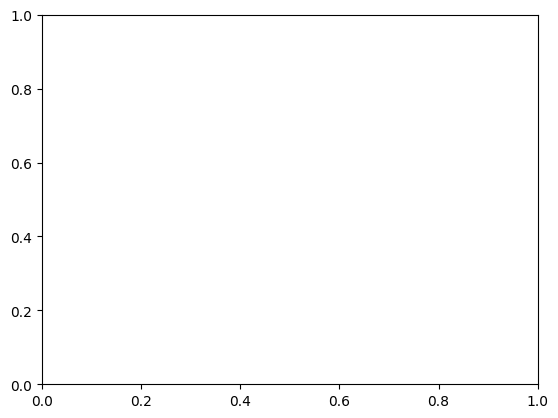

In [5]:
import matplotlib.pyplot as plt

# Create separate dataframes for increased and decreased readability
#df_inc = df[df['change in readability'] > 0]
#df_dec = df[df['change in readability'] < 0]

# Create boxplots for number of tokens in commit messages
fig, ax = plt.subplots()
ax.boxplot([df_increased['readability before commit'].apply(lambda x: len(x.split())), 
            df_decreased['readability after commit'].apply(lambda x: len(x.split()))])
ax.set_xticklabels(['Increased Readability', 'Decreased Readability'])
ax.set_ylabel('Readability Amount')
ax.set_title('Comparing Readability before and after commit')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create separate dataframes for increased and decreased readability
#df_inc = df[df['change in readability'] > 0]
#df_dec = df[df['change in readability'] < 0]

# Create boxplots for number of tokens in commit messages
fig, ax = plt.subplots()
ax.boxplot([df_increased['commit massage'].apply(lambda x: len(x.split())), 
            df_decreased['commit massage'].apply(lambda x: len(x.split()))])
ax.set_xticklabels(['Increased Readability', 'Decreased Readability'])
ax.set_ylabel('Number of Tokens')
ax.set_title('Box Plots of Number of Tokens in Commit Messages')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a Wordcloud for commits where readability has improved
text_increased = ' '.join(df_increased['commit massage'])
wordcloud_increased = WordCloud(width = 800, height = 680, background_color ='white').generate(text_increased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_increased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Create a list of specific tokens to plot
specific_tokens = [
    "fix",
    "renam",
    "enhanc",
    "format",
    "cleanup",
    "restor",
    "checkstyl",
    "error",
    "overrid",
    "modify",
    "comment",
    "use",
    "final",
    "remov",
    "replac"
]



# Tokenize the commit messages
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))

# Extract only the specific tokens
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        if token in specific_tokens:
            tokens.append(token)

# Compute the frequency distribution of the specific tokens
fdist = FreqDist(tokens)

# Get the top 50 most frequent tokens
top_tokens = fdist.most_common(50)

# Create a bar chart
fig, ax = plt.subplots(figsize=(16, 5))
ax.bar([token[0] for token in top_tokens], [token[1] for token in top_tokens])

# Add labels and title
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Specific Tokens')

plt.show()


In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Create a list of specific tokens to plot
specific_tokens = specific_tokens = [
    "fix",
    "renam",
    "enhanc",
    "format",
    "cleanup",
    "restor",
    "checkstyl",
    "error",
    "overrid",
    "modify",
    "comment",
    "use",
    "final",
    "remov",
    "replac"
]
# Tokenize the commit messages
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))

# Extract only the specific tokens
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        if token in specific_tokens:
            tokens.append(token)

# Compute the frequency distribution of the specific tokens
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

# Plot the frequency of the specific tokens
fdist.plot(50, cumulative=False)

plt.show()


In [ ]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
# Create a Wordcloud for commits where readability has decreased
text_decreased = ' '.join(df_decreased['commit massage'])
wordcloud_decreased = WordCloud(width = 800, height = 400, background_color ='white').generate(text_decreased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_decreased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Create a list of specific tokens to plot
specific_tokens = ["proper", "fix", "test", "name", "add", "method", "remov", "format", "file", "line", "code", "case", "class", "replace", "change"]


# Tokenize the commit messages
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))

# Extract only the specific tokens
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        if token in specific_tokens:
            tokens.append(token)

# Compute the frequency distribution of the specific tokens
fdist = FreqDist(tokens)

# Get the top 50 most frequent tokens
top_tokens = fdist.most_common(50)

# Create a bar chart
fig, ax = plt.subplots(figsize=(16, 5))
ax.bar([token[0] for token in top_tokens], [token[1] for token in top_tokens])

# Add labels and title
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Specific Tokens')

plt.show()


In [ ]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Create a list of specific tokens to plot
specific_tokens = ["proper", "fix", "test", "name", "add", "method", "remov", "format", "file", "line", "code", "case", "class", "replace", "change"]


# Tokenize the commit messages
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))

# Extract only the specific tokens
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        if token in specific_tokens:
            tokens.append(token)

# Compute the frequency distribution of the specific tokens
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

# Plot the frequency of the specific tokens
fdist.plot(50, cumulative=False)

plt.show()


In [ ]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed commit messages
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()